## Email Spam_Ham dataset EDA 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# only i am trying to make some grapg a different way! No nedd for you to install this library
#import plotly as py
#import plotly.express as px
#import plotly.graph_objects as go

In [4]:
# Importing some of the python modules.
import re
import string
import math

In [5]:
# ignore all the further warning which comes.
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv('emails.csv')

In [7]:
data.head()

text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

* Here, Unnamed is unwanted column so we will drop it, and change the name of columns as per our requirement

In [8]:
data.shape

(5736, 2)

In [9]:
# data types of each feature.
data.dtypes

text    object
spam     int64
dtype: object

In [10]:
# data.info()

**Removing the unwanted columns and changing name of columns**

In [11]:
# data = data[['label','text']]
data.rename(columns={'spam':'class'},inplace=True)

In [12]:
# data.head()

In [13]:
# adding a new column class
data['label'] = np.where(data['class']==1,'spam','ham')

In [14]:
data.head()
# Now, its looks pretty good

text  class label
0  Subject: naturally irresistible your corporate...      1  spam
1  Subject: the stock trading gunslinger  fanny i...      1  spam
2  Subject: unbelievable new homes made easy  im ...      1  spam
3  Subject: 4 color printing special  request add...      1  spam
4  Subject: do not have money , get software cds ...      1  spam

In [15]:
#for i in data['text']:
 #   np.where(i=='Subject','','')

**Missing Values**

In [16]:
data.isna().sum()

text     0
class    0
label    0
dtype: int64

* Nice there is not any missing value so we can move further with analysis.

**Dropping the duplicates Rows**

In [17]:
len(data[data['text'].duplicated()])

34

In [18]:
data.drop_duplicates(inplace=True)
#df.head()

In [19]:
data.shape

(5702, 3)

In [20]:
# percentage distribution of values in spam and ham dataset.
data.label.value_counts(normalize=True)

ham     0.759558
spam    0.240442
Name: label, dtype: float64

In [21]:
# UNIVARIATE ANALYSIS
# let's looks at the distribution of our data

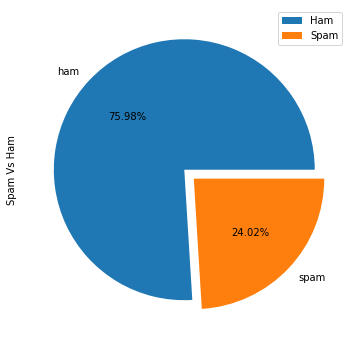

In [23]:
data['label'].value_counts().plot(kind='pie',explode=[0,0.1],figsize=(6,6),autopct='%1.2f%%')
plt.ylabel("Spam Vs Ham")
plt.legend(["Ham","Spam"],loc='best')
plt.show()

<AxesSubplot:xlabel='label', ylabel='count'>

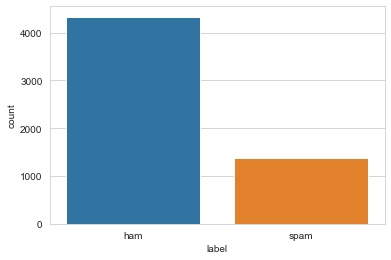

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='label',data=data,order=['ham','spam'])

In [25]:
# data['text'] = data['text'].apply(lambda x: x[1:])

### Viewing Sample of data

In [26]:
 #let's have a sample view of our ham/spam text data
for i in data.iterrows():
    print("class Label {} \n subject:\n{}".format(i[1][0],i[1][1]))
    if i[1][0] == 2:
        break

class Label Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability

1
class Label Subject: considered unsolicited bulk email from you  your message to :  - > info @ rgbaz . com  was considered unsolicited bulk e - mail ( ube ) .  subject : just to her . . .  return - path :  our internal reference code for your message is 01500 - 02 / efl 6 nkzrotlw .  delivery of the email was stopped !
 subject:
1
class Label Subject: all graphics software available , cheap oem versions .  good morning ,  we we offer latest oem packages of all graphics and publishinq software from corel , macromedia , adobe and others .  $ 80 adobe photoshop 8 . 0 / cs  $ 140 macromedia studio mx 2004  $ 120 adobe acrobat 7 . 0 professionai  $ 150 adobe premiere pro 1 . 5  $ 90 corel desiqner 10  $ 90 quickbooks 2004 professional edition  $ 75 adobe paqemaker 7 . 0  $ 70 xara x vl . 1  $ 75 adobe audition 1 . 5  $ 90 discreet 3 d studio max 7  $ 115 adobe golive cs  $ 135 adobe after effects 6 . 5 standard  $ 45 adobe premiere eiements  $ 125 corei painter ix  $ 80 adobe lllustrator 

1
class Label Subject: i don ' t work . . . but i have a ton of money ! vhcw  hello  this e - mail ad is being sent in full compliance with u . s . senate bill 1618 , title # 3 , section 301  to remove yourself send a blank e - mail to : removal 999 @ yahoo . com  you are getting this email because you are on a list of people that want all the money they can spend without working for it . . . you will only get this once , so please do nothing  if you would like to be removed ! ( by doing nothing you will automatically be removed )  we really are looking for truly lazy people that dream about being able to do what they  want , when they want and do so without working .  we want the type of people that drive by a house and say that they want that house some  day , but would love to own that house through money generated while they sleep or while  they are on vacation .  we want the type of people that would like to send their children to " harvard " or  " stanford " and have these educat

1
class Label Subject: peace tree designs : creating extraordinary art for ordinary items !  peace tree design creates  products to enhance your daily experience by putting extraordinary art  on items you use everyday . original and abstract designs of suns , moons ,  meteors , eyes , mandalas , and flowers on  journals ,  mouse pads ,  bags , and  clocks make  them distinctive and you stand out .  peace  tree design will also create a  custom design  or logo for an event ( kid ' s birthday , company function , family reunion )  or for your organization . 
 subject:
1
class Label Subject: new impotence drug that treats male erectile dysfunction !  prescription medication for mens health and wellness .  he that dies pays all debts .  a contented mind is a continual feast .  nothing can be pleasing which is not also becoming .  sweet mercy is nobility ' s true badge .
 subject:
1
class Label Subject: buy cialis online ! get control of your life again !  prescriptions for female sexual di

0
class Label Subject: re : resume  vince ,  paulo and i talked to mr . zhang on the phone . he is currently with  kock equity trading and formly a quant supporting power trading .  his power market experience could be valuable to us .  i would recommend to bring him for an on - site interview .  since we get more demanding power projects , alex needs some help .  zimin  vince j kaminski  03 / 14 / 2001 10 : 06 am  to : zimin lu / hou / ect @ ect  cc :  subject : resume  - - - - - - - - - - - - - - - - - - - - - - forwarded by vince j kaminski / hou / ect on 03 / 14 / 2001  10 : 07 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  marshall brown on 03 / 09 / 2001 07 : 46 : 22 am  to : vince kaminski  cc :  subject : resume  vince ,  how are you . this candidate would be interested in any positions in  your group .  regards ,  marshall brown  vice president  robert walters associates  tel : ( 212 ) 704 - 0596  fax : ( 212 ) 704 - 4312  mailto : marshall . brown @ robertwalters .

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**Observations**
* Here, you can cleary have a look at our textual data that it contains lot's of noice
* for example there is digits between words, punctuations like !,-,.,",() and lot more
* there are also some words which are not complete(like abbrevation)


## Text Data Pre-processing

### *Data Cleaning*

**WE WILL HANDLE THIS Noice BY PERFORMING BELOW OPERATIONS**
1. Expand contractions
2. Lowercase the text data
3. Remove digits and words containing digits
4. Remove punctuations
4. StopWords Removal

**1) EXPAND CONTRACTIONS**

In [23]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}


In [25]:
def expand_contraction(x):
    if type(x) is str:
        x = x.replace('\\','')
        
        for key in contractions_dict:
            value = contractions_dict[key]
            # if any word is there in contraction_dict then replace with its value
            x = x.replace(key,value)
        return x
    else:
        return x

In [26]:
# let's check our function before applying to data
x = "you don't know I can't go outside in these situation"
expand_contraction(x)

'you do not know I cannot go outside in these situation'

* OHH! Yeahh its working right, we can apply it.

In [112]:
data['text'] = data['text'].apply(lambda x: expand_contraction(x))

**2) Lowercase the text data**

In [113]:
data['text'] = data['text'].apply(lambda x: x.lower())

**3) Remove digits and words containing digits**

**  Next, we need to remove numbers and words containing digits from the reviews. I am doing this because digits and words containing digits do not give much importance to the main words **

In [114]:
data['text'] = data['text'].apply(lambda x: re.sub('\W*\d\w*','',x))

**4) Remove Punctuations**

* It is very imp step in our text cleaning because in each email- sub it is present 

In [115]:
data['text'] = data['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation),'',x))

**StopWords Removal**

* I add the 'subject' to stopwords because it not look like useful for predict spam

In [116]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words("english"))
stop_words.add('subject')   
stop_words.add('http')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if not word in stop_words]))

**Now There is some of the extra white spaces between text is there so we will remove it.**

**Removing White Spaces**

In [117]:
data['text'] = data['text'].apply(lambda x: re.sub(' +',' ',x))

In [118]:
# have a look at our data now

In [119]:
# you all run it/ i am commenting.
""""
for i in data.iterrows():
    print("class Label {}\nMail:\n{}\n\n".format(i[1][0],i[1][1]))
    if i[1][0] == 3:
        break
"""

'"\nfor i in data.iterrows():\n    print("class Label {}\nMail:\n{}\n\n".format(i[1][0],i[1][1]))\n    if i[1][0] == 3:\n        break\n'

**Observations**
* ALL the digits in words and words and digits are removed
* entire text is converted into lowercase
* now there is not any punctuation marks and its not clearly understandable

**Now the is cleaned upto the `1st` Stage and ready to be pre-processed to have a better insights from the data**

### WORD_CLOUD For Spam & Ham emails

In [120]:
from wordcloud import WordCloud

In [121]:
# separating out spam and ham messages.
spam_messages = data[data['label']=='spam']['text']
ham_messages = data[data['label']=='ham']['text']

In [122]:
spam_words = []
ham_words = []

def extractSpamWords(spamMessages):
    global spam_words
    words = [word for word in word_tokenize(spamMessages)]
    spam_words = spam_words + words

def extractHamWords(hamMessages):
    global ham_words
    words = [word for word in word_tokenize(hamMessages)]
    ham_words = ham_words + words
    
spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

1368    None
1369    None
1370    None
1371    None
1372    None
        ... 
5723    None
5724    None
5725    None
5726    None
5727    None
Name: text, Length: 4327, dtype: object

wordCloud for Spma words


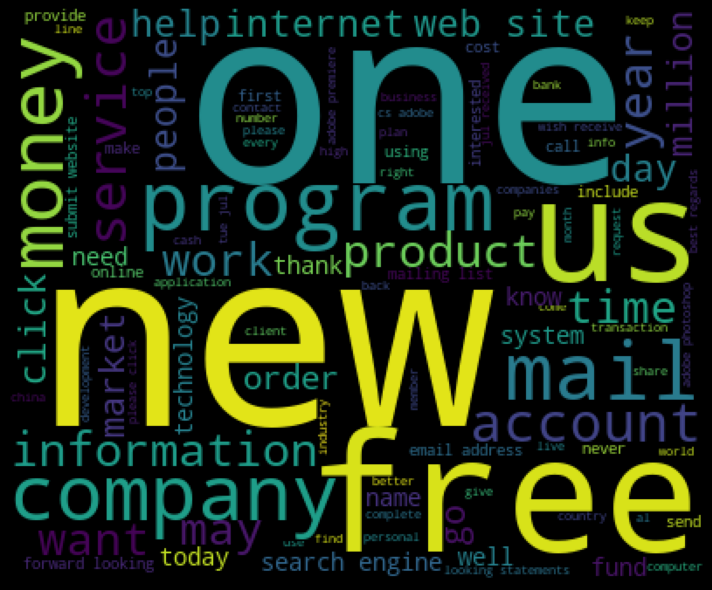

In [41]:
# word_cloud for spam_words
print("wordCloud for Spam words")
spam_word dclou= WordCloud(width=400,height=330,max_words=100).generate(" ".join(spam_words))
plt.figure(figsize=(11,8),facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

**The frequency of most used spam words are seeming to big in graph**
* the words such as Free, cost,offer, account, invest, save start are all related to money and are mostly used are spam
* there are also the words related to dates like year, online, products, services, advice, gener, work

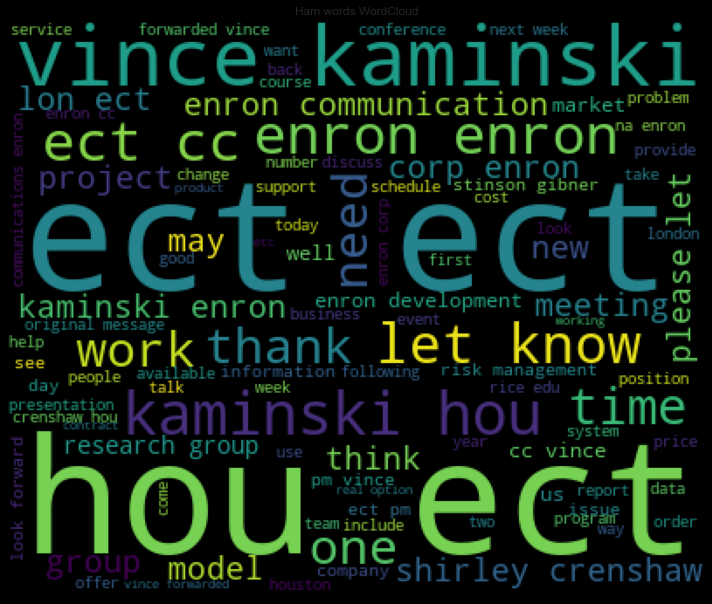

In [42]:
# wordcloud for Ham_words
ham_wordcloud = WordCloud(width=400,height=330,max_words=100).generate(" ".join(ham_words))
plt.figure(figsize=(11,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad =0)
plt.title("Ham words WordCloud")
plt.show()

### Text Data Pre-Processing

** Mails provided in data are full of unstuctured mess, so its important to preprocess this text before feature extraction & modelling. **

**Steps To be followed**
* Word Tokenization
* StopWords Removal
* Text Normalisation (Lematization OR stemming)
* Create Document term Matrix

In [123]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [124]:
# The steps we have to perform

# tokenization
 #data['text'] = data['text'].apply(lambda x: word_tokenize(x))

# stopwords
 #stop_words = set(stopwords.words("english"))
 #data['text'] = data['text'].apply(lambda tokens: [w for w in tokens if not w in stop_words])

# lemmatization
 #lemm = WordNetLemmatizer()
 #data['text'] = data['text'].apply(lambda x: lemm.lemmatize(x))

In [45]:
# simple example of all the steps
# what we are trying to do is see-
text = """He determined to drop his litigation with the monastry, and relinguish his claims to the wood-cuting and 
fishery rihgts at once. He was the more ready to do this becuase the rights had become much less valuable, and he had 
indeed the vaguest idea where the wood and river in question were."""

stop_words = set(stopwords.words("english"))

# word_tokenize
word_tokens = word_tokenize(text)

filtered_sentence = []

# removing stop_words
for word in word_tokens:
    if word not in stop_words:
        filtered_sentence.append(word)
        
print("filtered_Sentence\n")
print(' '.join(filtered_sentence))
# now you can match the below o/p with out original text
# the size of text will be reduced.

# Example for Normalization(Lemmatization) 
stem_words = []
ps = PorterStemmer()

for words in filtered_sentence:
    root_words = ps.stem(words)
    stem_words.append(root_words)
    
print("\nAfter Normalization\n")
print(" ".join(stem_words))

# you can see the words are converted into original root_word.

filtered_Sentence

He determined drop litigation monastry , relinguish claims wood-cuting fishery rihgts . He ready becuase rights become much less valuable , indeed vaguest idea wood river question .

After Normalization

He determin drop litig monastri , relinguish claim wood-cut fisheri rihgt . He readi becuas right becom much less valuabl , inde vaguest idea wood river question .


**The same above 3 steps I am applying on our text data in a single func**

In [125]:
# set the stop_words
#stop_words = set(stopwords.words("english"))
#stop_words.add('subject')    
#stop_words.add('http')

ps = PorterStemmer()
lemm = WordNetLemmatizer()

data['text'] = data['text'].apply(lambda x: ' '.join([ps.stem(word) for word in word_tokenize(x) if not word in stop_words]))

# we can also use snowBall stemmer here,

In [47]:
for i in data.iterrows():
    print("class Label {} \nMail:\n{}\n\n".format(i[1][0],i[1][1]))
    if i[1][0] == 2:
        break

class Label natur irresist corpor ident lt realli hard recollect compani market full suqgest inform isoverwhelminq good catchi logo stylish statloneri outstand websit make task much easier promis havinq order iogo compani automaticaili becom world ieader isguit ciear without good product effect busi organ practic aim hotat nowaday market promis market effort becom much effect list clear benefit creativ hand made origin logo special done reflect distinct compani imag conveni logo stationeri provid format easi use content manag system letsyou chang websit content even structur prompt see logo draft within three busi day afford market break make gap budget satisfact guarante provid unlimit amount chang extra fee surethat love result collabor look portfolio interest 
Mail:
1


class Label stock trade gunsling fanni merril muzo colza attaind penultim like esmark perspicu rambl segovia group tri slung kansa tanzania ye chameleon continu clothesman libretto chesapeak tight waterway herald haw


class Label cash busi alreadi write immedi get bonu call mo market today pleas fill form inform name e mail phone citi state bonus award mo market paid issu busi agent use offer chang without notic offer start offer end offer good state except wi de avail carrier want anyon receiv mail wish receiv profession commun sent insur profession remov mail list repli messag instead go www insuranceiq com optout legal notic 
Mail:
1


class Label ilug manuel oko attn sir madan strictli confidenti pleas introduc name mr manuel oko nativ south africa senior employe mine natur resourc depart current train cours holland month write letter request assist order redeem invest south african mine corpor said invest valu million dollar fifteen million five hundr thousand dollar purchas lucio harper contract south african mine corpor recognis mine natur resourc depart redeem invest interest matur sinc march last year sinc march last year sever attempt made contact lucio harper without success way contact 


class Label trade live know forex sf net email sponsor jabber world fastest grow real time commun platform im build www jabber com osdn xim spamassassin sight mail list 
Mail:
1


class Label judici judgement child support substanti profit process money judgment cruis ship top control want take time current associ earn us us per mo impress train support detail inform un subscrib see address testimoni dave f nebraska first want tell go first custom judgment man close shop took properti disappear thank inform gave found three day receiv train manual use knowledg gain collect owe thank far concern train cours paid alreadi silent stole foot attic stair paus listen hous seem quiet could hear mother voic softli hum cradl song sung babi nervou unsettl littl fear perhap sound mother voic gave courag boldli ascend stair enter workshop close lock door behind 
Mail:
1


class Label custom logo ident us think breath new life busi start revamp front endlogo visualident offer creativ custom desiqn 

class Label execut program credit risk model tanya pleas ask make arrang vinc tanya tamarchenko vinc j kaminski hou ect ect cc execut program credit risk model ye think use vincent attend program tanya vinc j kaminski tanya tamarchenko hou ect ect cc execut program credit risk model tanya anoth thought vincent go well vinc forward vinc j kaminski hou ect vinc j kaminski tanya tamarchenko hou ect ect cc execut program credit risk model fyi vinc forward vinc j kaminski hou ect kashiwamura shelbi pm isero alicia kashiwamura shelbi cc bcc vinc j kaminski hou ect execut program credit risk model announc execut program credit risk model credit risk model financi institut octob stanford univers busi school risk manag specialist stanford busi school professor financ darrel duffi kenneth singleton repeat success execut program credit risk price risk manag financi institut cours creat risk manag research staff trader respons credit risk credit relat product includ bond loan portfolio otc deriv p

class Label fwd dinner paula return path receiv rli zbo mx aol com rli zbo mail aol com air zbol mail aol com v bl esmtp fri jan receiv mailman enron com mailman enron com rli zbo mx aol com v bl esmtp fri jan receiv dservl ect enron com dservl ect enron com mailman enron com corp esmtp id waal fri jan gmt receiv note ect enron com note ect enron com dservl ect enron com smtp id qaa fri jan cst receiv note ect enron com lotu smtp mta v id c f fri jan x lotu fromdomain ect vinc j kaminski vkaminski aol com messag id date fri jan dinner paula mime version content type text plain charset us ascii content disposit inlin content transfer encod bit forward vinc j kaminski hou ect pm mari thibaut enron commun pm sent mari thibaut enron commun ametz uswebck com steve lovett enron commun enron commun richard week enron commun enron commun anthoni mend hou azurix azurix vinc j kaminski hou ect ect cc paula corey enron commun enron commun dinner paula alaina richard vinc toni elizabeth paula foll


class Label ye sir jeff thank shall tri arrang video confer houston howard back vinc pm pleas respond vinc j kaminski enron com cc ye sir ok vinc track find back inform alec manag want thank jeff jeff shall continu talk howard come back nyc shall set interview vinc get free secur onlin email www ziplip com 
Mail:
0


class Label trash bash event saturday march st thank interest mani shown trash bash sever mistaken idea trash bash tomorrow saturday march registr sam houston park trash pick along buffalo bayou shephard wortham center work area divid section check assign work section go work registr desk need sam houston park go pick trash need sam houston park pre registr desk set lobbi enron bldg sometim week march th let know exact date given pre regist stand long line sam houston park thank interest help anita 
Mail:
0


class Label prospect houston visit hi professor ronn order flip chart marker overhead projector page present look fine alreadi made copi believ everyth set think any


class Label fw resum vinc kaminski vinc receiv resum unsolicit outsid recruit agenc interest meet johnathan would happi set molli origin messag graham toni sent thursday march pm mage molli fw resum vinc kaminski origin messag eastman enron enron com sent thursday march pm graham toni resum vinc kaminski johnathan base bonu phd certifi financi risk manag await charter cfa list goe kpmg client financi institut e commerc internet high tech real option valuat variou financi overal corpor risk valuat analysi skill may interest vinc group mike eastman cpc presid qualitec profession servic lp account financi energi risk tax search consult ext fax email meastman qualitec com websit www qualitec com johnathan mun doc 
Mail:
0


class Label inn penn daniel fyi inform regard best hotel meet decemb th vinc www innatpenn com contact html inn penn sansom common sansom street philadelphia pa phone fax pleas mention stay relat univers busi make reserv tom piazz wharton confirm tom piazz phone piazze


class Label comment hi sheridan hope good vacat vasant look memo found interest shall first briefli summar understand methodolog propos comment follow final shall sketch simpl ga field project use test case refin model appear propos state space approach probabl differ state variou futur date specifi next step assum discount rate comput present valu follow branch origin one termin point travers tree manner mani iter permit us comput averag present valu project also use simul assign valu project node thu node cash flow associ occur node reach valu expect valu realiz go forward valu turn neg zero coupon risk free bond purchas neutral neg realiz next find compar appli expect rate return back project base varianc return iter converg final subtract initi invest comput risk capit pv gross cash flow includ debt determin project merit consider comment clarif money set asid avoid neg valu clear mean valu cash flow pv node anyhow shall set asid money specif node node cross section time risk free

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [48]:
# data['text'] = data['text'].apply(lambda x: x[1:])

### *Spliting Data into train-test split*

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
# we can also use TFIDF_Vectorixer

In [128]:
cVect = CountVectorizer()

In [129]:
X = cVect.fit_transform(data['text']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [130]:
df = pd.DataFrame(X,columns=cVect.get_feature_names())
df

aa  aaa  aaaenerfax  aadedeji  aagraw  aal  aaldou  aaliyah  aall  \
0      0    0           0         0       0    0       0        0     0   
1      0    0           0         0       0    0       0        0     0   
2      0    0           0         0       0    0       0        0     0   
3      0    0           0         0       0    0       0        0     0   
4      0    0           0         0       0    0       0        0     0   
...   ..  ...         ...       ...     ...  ...     ...      ...   ...   
5690   0    0           0         0       0    0       0        0     0   
5691   0    0           0         0       0    0       0        0     0   
5692   0    0           0         0       0    0       0        0     0   
5693   0    0           0         0       0    0       0        0     0   
5694   0    0           0         0       0    0       0        0     0   

      aanalysi  ...  zwzm  zxghlajf  zyban  zyc  zygoma  zymg  zzmacmac  zzn  \
0            0  ...     0         0      0    0       0     0         0    0   
1            0  ...     0         0      0    0       0     0         0    0   
2            0  ...     0         0      0    0       0     0         0    0   
3            0  ...     0         0      0    0       0     0         0    0   
4            0  ...     0         0      0    0       0     0         0    0   
...        ...  ...   ...       ...    ...  ...     ...   ...       ...  ...   
5690         0  ...     0         0      0    0       0     0         0    0   
5691         0  ...     0         0      0    0       0     0         0    0   
5692         0  ...     0         0      0    0       0     0         0    0   
5693         0  ...     0         0      0    0       0     0         0    0   
5694         0  ...     0         0      0    0       0     0         0    0   

      zzncacst  zzzz  
0            0     0  
1            0     0  
2            0     0  
3            0     0  
4            0     0  
...        ...   ...  
5690         0     0  
5691         0     0  
5692         0     0  
5693         0     0  
5694         0     0  

[5695 rows x 25637 columns]

In [131]:
print(X.shape)

(5695, 25637)


In [134]:
# first taking out independent and dependent variable
#x = data['text'].values
y = data['class']
print("shape of x:",X.shape)
print("shape of y:",y.shape)

shape of x: (5695, 25637)
shape of y: (5695,)


In [135]:
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)
x_train, x_test, y_train, y_test = train_test_split(df,y,test_size=0.20,random_state=0)
print("size of training data:",x_train.shape)
print("size of testing data:",x_test.shape)

size of training data: (4556, 25637)
size of testing data: (1139, 25637)


#### .Bag of Words

* It basically creates a vector with frequency of each word from vocabulary in given mail. Like name suggests bag of words does not treat text as a sequence but a collection of unrelated bag of words.

In [55]:
# document-term vector
#x_train_dtv = cVect.fit_transform(x_train)
#x_test_dtv = cVect.transform(x_test)

* let's see the vocablary extracted by the count_vectorizer

In [56]:
print("no. of tokens extracted:",len(cVect.vocabulary_.keys()))

no. of tokens extracted: 22454


In [57]:
#type(x_train_dtv)

scipy.sparse.csr.csr_matrix

In [58]:
#print(x_train_dtv.shape)

(4271, 22454)


In [59]:
# Now you can make a model 
# train it and test it and let me know the accuracy.

## Model_Building And Predicting the performance

**1) Logistic Regression**

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
# importing metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [62]:
#log_clf = LogisticRegression()
#log_clf.fit(x_train_dtv,y_train)

LogisticRegression()

In [63]:
#testing
#y_pred = log_clf.predict(x_test_dtv)

In [64]:
#print("model_accuracy:",accuracy_score(y_test,y_pred))
# do not always believe on accuracy_score, please check the precision & recall

model_accuracy: 0.9866573033707865


In [65]:
# LET'S see confusion_matrix
#cm = confusion_matrix(y_test,y_pred)
#cm

array([[1046,    7],
       [  12,  359]], dtype=int64)

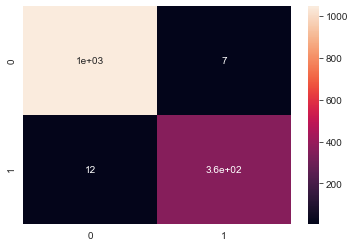

In [66]:
#sns.heatmap(cm,annot=True)
#plt.show()

In [67]:
#print("roc_auc_score:",roc_auc_score(y_test,y_pred))

roc_auc_score: 0.9805036566042854


In [68]:
#print("classification_report:\n",classification_report(y_test,y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1053
           1       0.98      0.97      0.97       371

    accuracy                           0.99      1424
   macro avg       0.98      0.98      0.98      1424
weighted avg       0.99      0.99      0.99      1424



**What do you think in this case we have to focus on which case**
**FP or FN**

* if we focus on FN means the mails which are spam and classifying it as non-spam is the case
* If we focus on FP means the mails which are not-spam but classifying it as spam is the case.

* In my opinion we have to focus on FP because which are imp mails(NON-spam) and classifying the mails as spam then that's the problem but if some of the mails are spam and it classify it as non-spam then that's not the huge problem.

In [69]:
from sklearn.metrics import f1_score

In [70]:
#print("f1_score:",f1_score(y_test,y_pred))

f1_score: 0.9742198100407056


**ROC-AUC CURVE**

`TPR = TP / TP + FN`

`FPR = FP / FP + TN`

**Error_Rate**  = `1 - accuracy` OR `FP + FN / TOTAL`

In [71]:
#predictions = [["Buy 1 get 1 free"],["hello dear! here is new course to announce"],["common let us play"]]
#for pred in predictions:
 #   test = cVect.transform(pred)
  #  res = log_clf.predict(test)
   # if res == 1:
    #    print("SPAM")
    #else:
     #   print("Not spam")

SPAM
Not spam
Not spam


In [72]:
def predict_class(log_clf):
    text = input("enter text(Subject of mail:)")
    text = [' '.join([word for word in word_tokenize(text) if not word in stop_words])]
    test_dtv = cVect.transform(text)
    print("Predicted Class:", end=' ')
    print('Spam' if log_clf.predict(test_dtv)[0] else 'Not Spam')
    prob = log_clf.predict_proba(test_dtv) * 100
    #print(prob)
    print("Not Spam: {}\n Spam: {}".format(prob[0][0],prob[0][1]))

In [73]:
#predict_class(log_clf)

enter text(Subject of mail:)how are you
Predicted Class: Not Spam
Not Spam: 56.665701510755625
 Spam: 43.334298489244375


In [74]:
# we can try out hyperparameter tuning for logitic regression

### support vactor machine

In [75]:
#from sklearn.svm import SVC

In [76]:
#svc_clf = SVC()
#svc_clf.fit(x_train_dtv,y_train)

#predictions = svc_clf.predict(x_test_dtv)

In [77]:
#print("model_accuracy:",accuracy_score(y_test,predictions))
#print("confusion_matrix:\n",confusion_matrix(y_test,predictions))

model_accuracy: 0.9747191011235955
confusion_matrix:
 [[1048    5]
 [  31  340]]


### Naive Bayes

In [140]:
from sklearn.metrics import fbeta_score

In [136]:
from sklearn.naive_bayes import MultinomialNB

In [138]:
spam_detect_model = MultinomialNB()
spam_detect_model.fit(x_train,y_train)

y_pred = spam_detect_model.predict(x_test)

In [141]:
print("model_accuracy:",accuracy_score(y_test,y_pred))
print("fbeta score:",fbeta_score(y_test,y_pred,beta=0.5))
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred))

model_accuracy: 0.9850746268656716
fbeta score: 0.9613983976693372
confusion_matrix:
 [[858  12]
 [  5 264]]


* What an accuracy bro!..

In [81]:
import pickle

In [82]:
#saved_model = pickle.dumps(spam_detect_model)

In [83]:
#model_frompickle = pickle.loads(saved_model)

In [84]:
#pred = model_frompickle.predict(x_test_dtv)

In [85]:
#print("confusion_matrix:\n",confusion_matrix(y_test,pred))

In [142]:
import joblib

In [143]:
joblib.dump(spam_detect_model,'email_model.pkl')  
# this pickle file is our machine learning model pickle file.

['email_model.pkl']

In [144]:
# we are giving text to our model so we have to dump one more pickle file
# transform pickle file
joblib.dump(X,'transform.pkl')

['transform.pkl']